**<h1><b>Applied Machine Learning<b></h1>**
<h2>Αλέξανδρος - Ιωάννης Δουνάκης</h2> 
<h3>3170044</h3>




## <h3>Εργασία 1 </h3>

<h3><b>Q1</b></h3>
Obtaining the Data 



In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

rawData = pd.read_csv("2757408.csv",parse_dates=['DATE'] )
#rawData.DATE = pd.to_datetime(rawData.DATE)

rawData2 = pd.read_csv("athens.csv",parse_dates=['DATE'])
#rawData2.DATE = pd.to_datetime(rawData2.DATE)

<h3>Αρχή Διαχείρισης 1ου Σετ Δεδομένων </h3>
Διασχίζουμε τα dataset προκειμένου να δούμε ποια δεδομένα λείπουν.
Βλέπουμε πως οι NaN τιμές ειναι πολλές στο column TAVG , η οποία σίγουρα θα χρειαστεί προκειμένου να κάνουμε την ανάλυση

In [265]:
print("rawData NAN VALUES IN TAVG \n",rawData.TAVG.isna().sum())
print("rawData NAN VALUES IN TMAX \n",rawData.TMAX.isna().sum())
print("rawData NAN VALUES IN TMIN \n",rawData.TMIN.isna().sum())
print("rawData NAN VALUES IN PRCP \n",rawData.PRCP.isna().sum())

rawData NAN VALUES IN TAVG 
 2311
rawData NAN VALUES IN TMAX 
 944
rawData NAN VALUES IN TMIN 
 833
rawData NAN VALUES IN PRCP 
 478


Θέλοντας να φτιάξουμε τα δεδομένα χρειάζεται να αλλάξουμε τις τιμές NaN σε μηδέν έτσι ώστε να είναι πιο διαχειρίσιμες

In [266]:
rawData.TAVG.fillna(0,inplace=True)
rawData.TMAX.fillna(0,inplace=True)    
rawData.TMIN.fillna(0,inplace=True)
rawData.PRCP.fillna(0,inplace=True)


Συνεπώς , πρεπει να διαμορφώσουμε τα δεδομένα τα οποία λείπουν απο το 1ο σετ δεδομένων.<br>
Αρχικά τα δεδομένα που χρειάζονται διαμόρφωση είναι όσες τιμές του TAVG == 0 εφόσον νωρίτερα τρέξαμε την <br><code>rawData.TAVG.fillna(0,inplace=True)</code> 
<br>
Συνεπώς τα βήματα που ακολουθούμε ειναι τα εξής:
<br>
<lu>
    1. Κατατόπιση των: <br>
        <li>A: Το σύνολο των γραμμών για τις οποίες ισχύει TAVG =0 και ΤΜΑΧ != 0 και ΤΜΙΝ != 0 </li>
        <li>Β: Το σύνολο των γραμμών για τις οποίες ισχύει TAVG =0 και ΤΜΑΧ =0 ή ΤΜΙΝ =0 </li>
        <br>
    2. Για το σύνολο Α , θέτουμε την τιμη TAVG όσο το AVG των στοιχείων TMAX και TMIN (στη περίπτωση μας το AVG ταυτίζεται με το median) <br>
    3. Για το σύνολο Β , θέτουμε την τιμη TAVG ίσο με την τιμη TMAX / TMIN ή οποία ειναι διαφορετική απο μηδέν.
</lu>
<br>
THIS WORKS
we dont take into consideration the case where (TAVG > TMAX) | (TAVG < TMIN)

In [267]:
rawData.TAVG.mask((rawData.TAVG == 0) & (rawData.TMAX != 0) & (rawData.TMAX != 0) , (rawData.TMAX +rawData.TMIN) /2 ,inplace =True)
rawData.TAVG.mask((rawData.TAVG == 0) & ((rawData.TMAX == 0) | (rawData.TMIN == 0)),rawData.TMAX + rawData.TMIN, inplace = True)

Παρατηρώντας τα δεδομένα του αρχικού σετ δεδομένων , παρατηρούμε πως η μονάδα μέτρησης θερμοκρασίας δεν ειναι κελσίου , οπότε κάνουμε Fahrenheit to Celcius.

In [268]:
rawData.TAVG.mask(rawData.TAVG > 0 ,( (rawData.TAVG - 32.0) * 5.0 / 9.0) , inplace=True)

Επίσης για την διαμόρφωση των δεδομένων χρειάζεται να ελέγξουμε την πληρότητα των τιμών στο πεδίο <code>rawData.PRCP</code> <br>
Εξετάζοντας τα δεδομένα αυτά βλέπουμε πως το ποσοστο των τιμών NaN για τα έτη 2010 μέχρι 2019 είναι πολύ μεγάλο έτσι ώστε να μπορούμε να εξάγουμε συμπεράσματα. <br>
Συνεπώς θα χρειαστούμε να αντικαταστήσουμε τα δεδομένα που λείπουν απο το 2ο dataset που μας δίνεται , τρέχουμε την εντολή αυτή αργότερα σε διαφορετικό κελί. <br>


In [269]:
toCount = rawData.PRCP.loc[(rawData.DATE > '2010-1-1') & (rawData.DATE < '2020-1-1') ]
print("PERCENTAGE OF NAN IN PRCP THROUGH 2010 - 2019\n",((toCount == 0).sum())/toCount.size *100)

PERCENTAGE OF NAN IN PRCP THROUGH 2010 - 2019
 86.24017155110793


Τέλος , θέλουμε να δούμε την πληρότητα στις μέρες που καλύπτει το αρχικό dataset.
Βάση του παρακάτω κώδικα βλέπουμε πως απο τις 365* (2020-2010) ~ 3.652 μέρες που υπάρχουν σε 10 χρόνια , στο σετ εμφανίζονται πολύ λιγότερες.<br>
Συνεπώς θα χρειαστούμε να πάρουμε τα δεδομένα για τις μέρες οι οποίες λείπουν ,απο το 2ο σετ.<br>
Βλέπουμε πως όντως το 2ο σετ δεδομένων ειναι πολυ πιο πλήρες για την 10ετία 2010 με 2019.

In [270]:
days = rawData.DATE.loc[(rawData.DATE >='2010-1-1') & (rawData.DATE < '2020-1-1')]
days2 = rawData2.DATE.loc[(rawData2.DATE >= '2010-1-1') & (rawData2.DATE < '2020-1-1')]

print("PERCENTAGE OF DAYS \n",days.size / days2.size *100)

PERCENTAGE OF DAYS 
 76.64293537787513


<h3>Αρχη διαχειρισης 2ο Σετ Δεδομένων</h3>
Ωστόσο στο 2o Dataset δεν φαίνεται να λείπουν δεδομένα χρήσιμα σε εμάς.

In [271]:
print("rawData2 NAN VALUES IN TAVG \n",rawData2.TAVG.isna().sum())
print("rawData2 NAN VALUES IN TMAX \n",rawData2.TMAX.isna().sum())
print("rawData2 NAN VALUES IN TMIN \n",rawData2.TMIN.isna().sum())
print("rawData2 NAN VALUES IN PRCP \n",rawData2.PRCP.isna().sum())

# (rawData.TAVG == float(0)).sum()

rawData2 NAN VALUES IN TAVG 
 0
rawData2 NAN VALUES IN TMAX 
 0
rawData2 NAN VALUES IN TMIN 
 0
rawData2 NAN VALUES IN PRCP 
 0


rawData2.PRCP normalization to [0.0-1.0] ,as seen in original rawData  
Ωστόσο υπάρχουν δεδομένα που έχουν τιμη <code>TAVG == '---' </code> , που είναι ενα φοβερό easter egg της διαδικασίας.
Τα δεδομένα αυτα τα διαγράφουμε εντελώς αφού ειναι ενα πολυ μικρό ποσοστό.

In [272]:
rawData2.PRCP.mask( rawData2.PRCP >0 , rawData2.PRCP/100 , inplace=True)
#df.drop(df[df.score < 50].index, inplace=True)
rawData2.drop(rawData2[rawData2.TAVG == '---'].index , inplace=True)
rawData2[rawData2.TAVG =='---']


,DATE,TAVG,TMAX,TMIN,HUMIDITY,PRCP,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23


Αφού τροποποιήσαμε τα δεδομένα μας και στα 2 σετ που δίνονται , τώρα είναι έτοιμα ετσι ώστε να δημιουργήσουμε έναν καινούργιο DateFrame.<br>
Για την σωστή συνένωση , βρίσκουμε ποιές ημερομηνίες του 2ου σετ υπάρχουν στο 1ο (που συνεπώς δεν τις χρειαζόμαστε) και τις αφαιρούμε. <br>
Την ένωση των δεδομένων την πραγματοποιούμε με τη μέθοδο <code>rawData.append(rawData2).copy()</code> , ακόμα κρατάμε τα column που μας χρησιμεύουν.<br>

In [273]:
rawData2 = rawData2[~rawData2.DATE.isin(rawData.DATE)]
data = rawData.append(rawData2).copy()
data = data[['DATE' ,'TAVG' , 'PRCP']]
data = data.astype({"TAVG" : float})
#data


<h3> Δημιουργία DataFrames για την αποθήκευση των στατιστικών</h3> <br>
Παρακάτω εμφανίζουμε τον πίνακα <code>monthAvg</code> ταξινομημένο βάση του <code>monthAvg['YEAR','MONTH']</code> (DATE) ώντας ταξινομημένα απο τη μικρότερη προς μεγαλύτερη.

In [274]:
monthAvg = pd.DataFrame({'YEAR': data.DATE.dt.year,'MONTH': data.DATE.dt.month,'TAVG': data.TAVG , 'PRCP': data.PRCP} , index=None)
#print("MONTHLY AVERAGE \n",monthAvg.groupby(['YEAR','MONTH']).mean('TAVG').sort_values(by=['YEAR','MONTH']))

summerAvg = monthAvg[(monthAvg.MONTH > 5) & (monthAvg.MONTH < 9)]
summerAvg = summerAvg[['YEAR' ,'TAVG']]
summerAvg = summerAvg.groupby('YEAR' , as_index=False).mean('TAVG').sort_values(by='YEAR')
summerAvg 

,YEAR,TAVG
0,1955,25.932971
1,1956,27.149758
2,1957,27.376208
3,1958,27.041063
4,1959,26.394928
...,...,...
61,2016,28.176329
62,2017,28.079348
63,2018,27.409420
64,2019,28.013285


Αντίστοιχα , εμφανίζουμε τον πίνακα <code>yearAVG</code> βάση του <code>index</code> (DATE) ταξινομημένα απο τη μικρότερη προς μεγαλύτερη

In [275]:
yearAvg = pd.DataFrame({'YEAR' : data.DATE.dt.year , 'TAVG' : data.TAVG , 'PRCP' : data.PRCP})
yearAvg = yearAvg.astype({"TAVG" :float})
yearAvg = yearAvg.groupby('YEAR' , as_index=False).mean('TAVG').sort_values(by='YEAR')
#yearAvg

<h3><b>Q2</b></h3>
Deviation Of Summer Temperatures


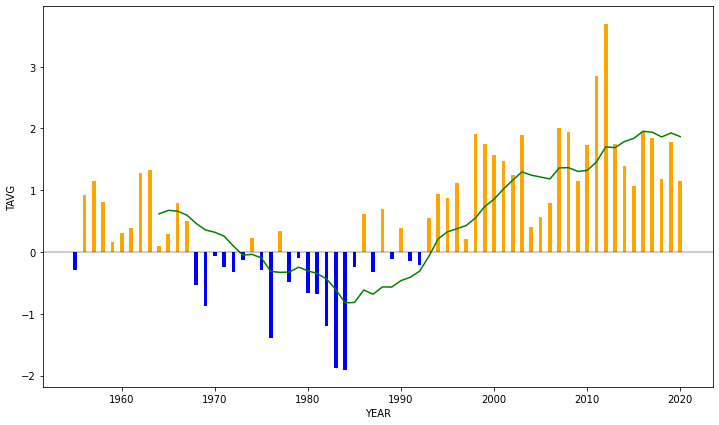

In [332]:
X = summerAvg[(summerAvg.YEAR > 1973) & (summerAvg.YEAR < 2000)]
#print(summerAvg)
summerAvgDiff = pd.DataFrame({'YEAR' : summerAvg.YEAR , 'TAVG' : summerAvg.TAVG})
#print(X)
summerAvgDiff.TAVG = summerAvg.TAVG - X.TAVG.mean()

plt.figure(figsize= (12,7))

positive = pd.DataFrame({ 'YEAR' : summerAvgDiff.YEAR , 'TAVG' : summerAvgDiff.TAVG})
positive[positive.TAVG < 0 ] = 0

negative = pd.DataFrame({ 'YEAR' : summerAvgDiff.YEAR , 'TAVG' : summerAvgDiff.TAVG})
negative[positive.TAVG > 0] = 0 

plt.bar(x = summerAvgDiff.YEAR , height = positive.TAVG , color = 'orange' , width= 0.4 )
plt.bar(x = summerAvgDiff.YEAR , height = negative.TAVG , color = 'blue' , width=0.4 )

rollingAvg = summerAvgDiff.TAVG.rolling(10).mean()

sb.lineplot( x = 'YEAR' , y= rollingAvg , data = summerAvgDiff , color= 'green' )

plt.axhline(0 , color ='black' , linewidth = 0.4)

plt.show()
